In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:/Genai_Projects/ai_ecom_agent/Data/churn.csv")


In [3]:
df_cleaned = df.copy()

In [4]:
df_cleaned.head()

,order_id,customer_id,product_id,category,price,discount_percentage,quantity,payment_method,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,date,month,year,churn
0,O100000,C17270,P234890,Home,164.08,15,1,Credit Card,4,West,No,139.47,7.88,31.17,60,Female,23,12,2023,0
1,O100001,C17603,P228204,Grocery,24.73,0,1,Credit Card,6,South,No,24.73,4.60,-2.62,37,Male,3,4,2025,0
2,O100002,C10860,P213892,Electronics,175.58,5,1,Credit Card,4,North,No,166.80,6.58,13.44,34,Male,8,10,2024,1
3,O100003,C15390,P208689,Electronics,63.67,0,1,UPI,6,South,No,63.67,5.50,2.14,21,Female,14,9,2024,0
4,O100004,C15226,P228063,Home,16.33,15,1,COD,6,East,No,13.88,2.74,1.15,39,Male,21,12,2024,0


In [5]:
df_cleaned.tail()

,order_id,customer_id,product_id,category,price,discount_percentage,quantity,payment_method,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,date,month,year,churn
34495,O134495,C13553,P231412,Fashion,10.44,20,1,Debit Card,3,North,No,8.35,3.04,-0.12,23,Female,13,8,2025,0
34496,O134496,C11349,P218266,Beauty,4.79,10,5,Debit Card,6,South,Yes,21.56,3.37,6.33,61,Female,4,12,2023,1
34497,O134497,C12986,P204345,Electronics,323.64,0,5,Credit Card,6,East,No,1618.20,12.18,182.00,41,Female,1,2,2025,0
34498,O134498,C17196,P217644,Home,23.09,5,1,Credit Card,6,East,No,21.94,5.61,0.53,27,Female,27,3,2024,0
34499,O134499,C13330,P207047,Home,76.84,0,1,Debit Card,6,East,No,76.84,7.57,13.95,19,Male,11,9,2025,0


In [6]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             34500 non-null  object 
 1   customer_id          34500 non-null  object 
 2   product_id           34500 non-null  object 
 3   category             34500 non-null  object 
 4   price                34500 non-null  float64
 5   discount_percentage  34500 non-null  int64  
 6   quantity             34500 non-null  int64  
 7   payment_method       34500 non-null  object 
 8   delivery_time_days   34500 non-null  int64  
 9   region               34500 non-null  object 
 10  returned             34500 non-null  object 
 11  total_amount         34500 non-null  float64
 12  shipping_cost        34500 non-null  float64
 13  profit_margin        34500 non-null  float64
 14  customer_age         34500 non-null  int64  
 15  customer_gender      34500 non-null 

In [7]:
df_numeric = df_cleaned.select_dtypes(include="number")

In [8]:
df_numeric.columns

Index(['price', 'discount_percentage', 'quantity', 'delivery_time_days',
       'total_amount', 'shipping_cost', 'profit_margin', 'customer_age',
       'date', 'month', 'year', 'churn'],
      dtype='object')

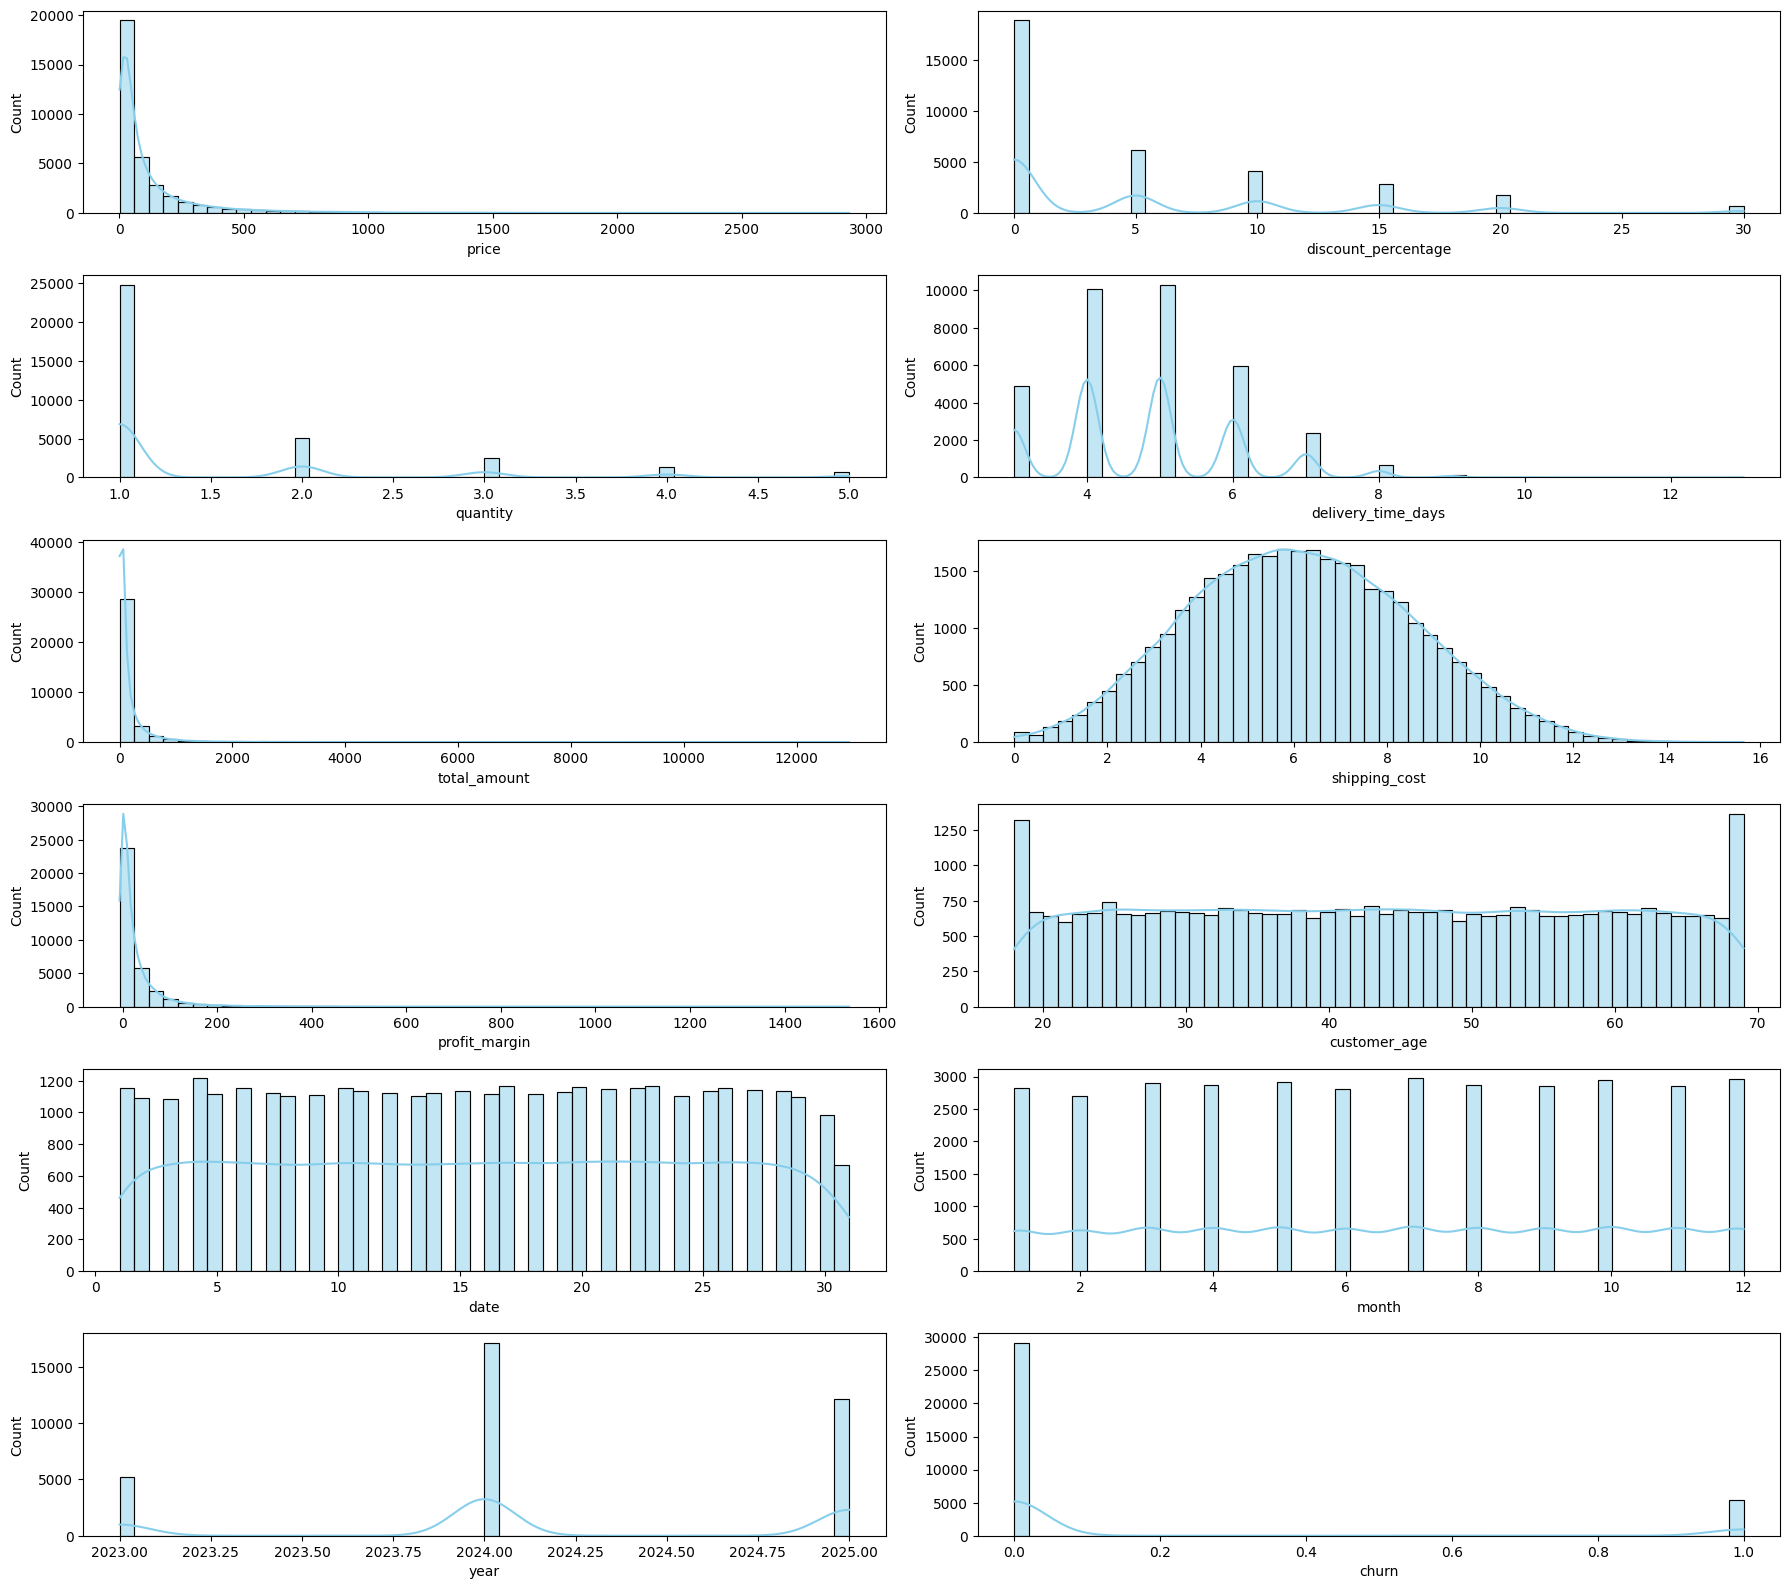

In [9]:
import math
nums_col = len(df_numeric.columns)
num_of_rows = math.ceil(nums_col/2)
plt.figure(figsize=(18, 16))
for i,col in enumerate(df_numeric.columns,1):
    plt.subplot(num_of_rows,2,i)
    sns.histplot(df_numeric[col],kde=True,bins= 50,color="skyblue")
plt.tight_layout() 

<Axes: xlabel='churn'>

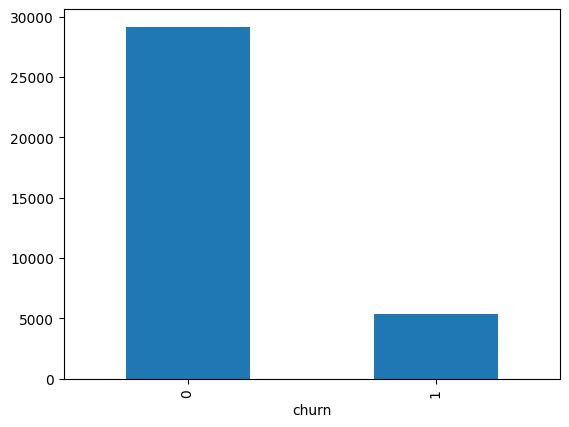

In [10]:
df_cleaned["churn"].value_counts().plot(kind="bar")


In [11]:
df_cleaned["churn"].value_counts()

churn
0    29145
1     5355
Name: count, dtype: int64

In [12]:
df_cleaned.drop(columns=["order_id","customer_id","product_id"],axis=1,inplace=True)

In [13]:
cleaned_df = df_cleaned.copy()

In [14]:
df_cat = df_cleaned.select_dtypes(exclude="number")
df_cat.columns

Index(['category', 'payment_method', 'region', 'returned', 'customer_gender'], dtype='object')

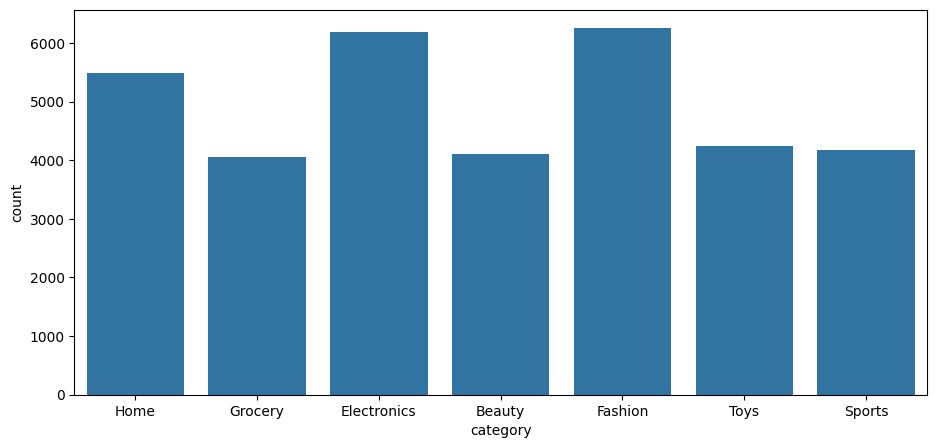

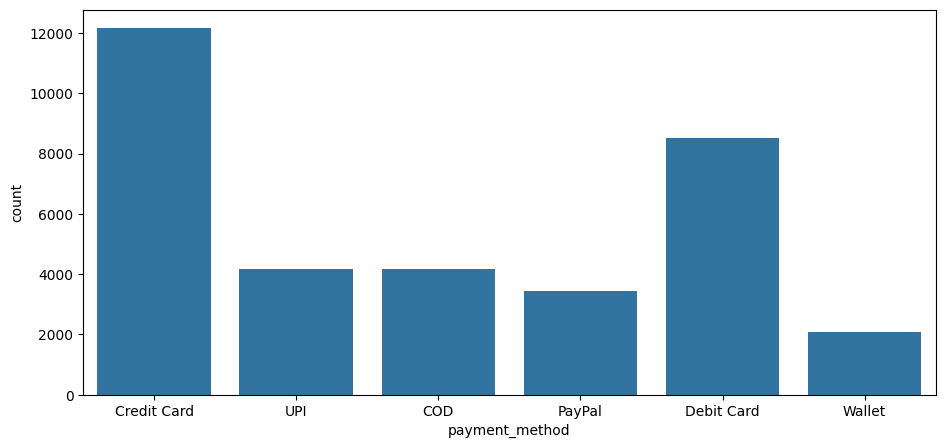

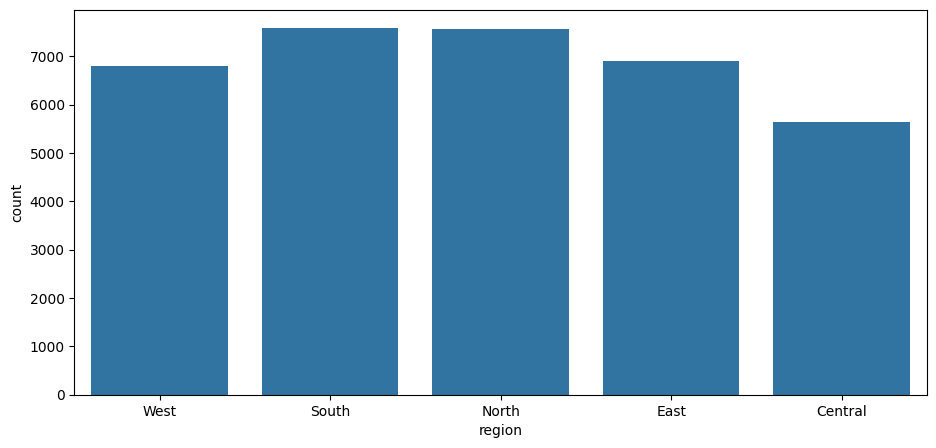

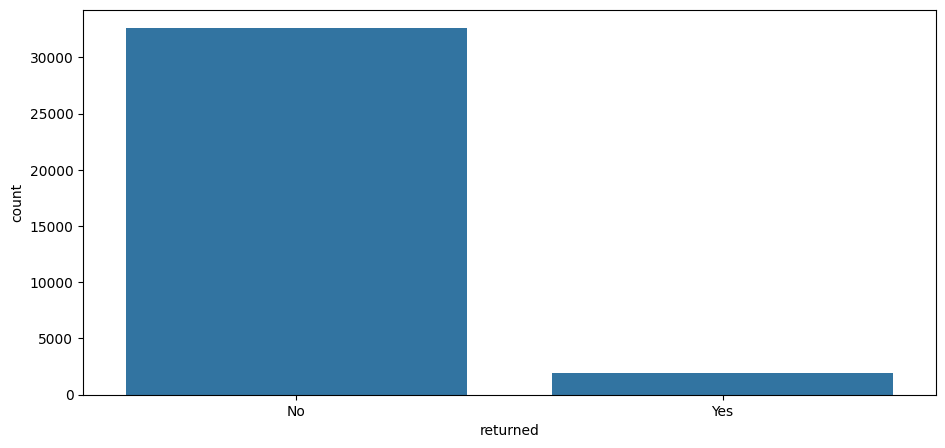

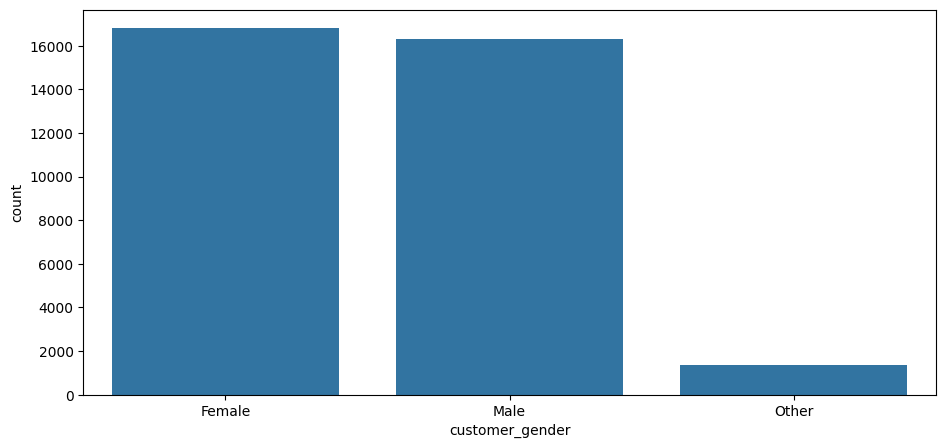

In [15]:
for col in df_cat.columns:
    plt.figure(figsize=(11, 5))
    sns.countplot(x=df_cat[col])

<Axes: >

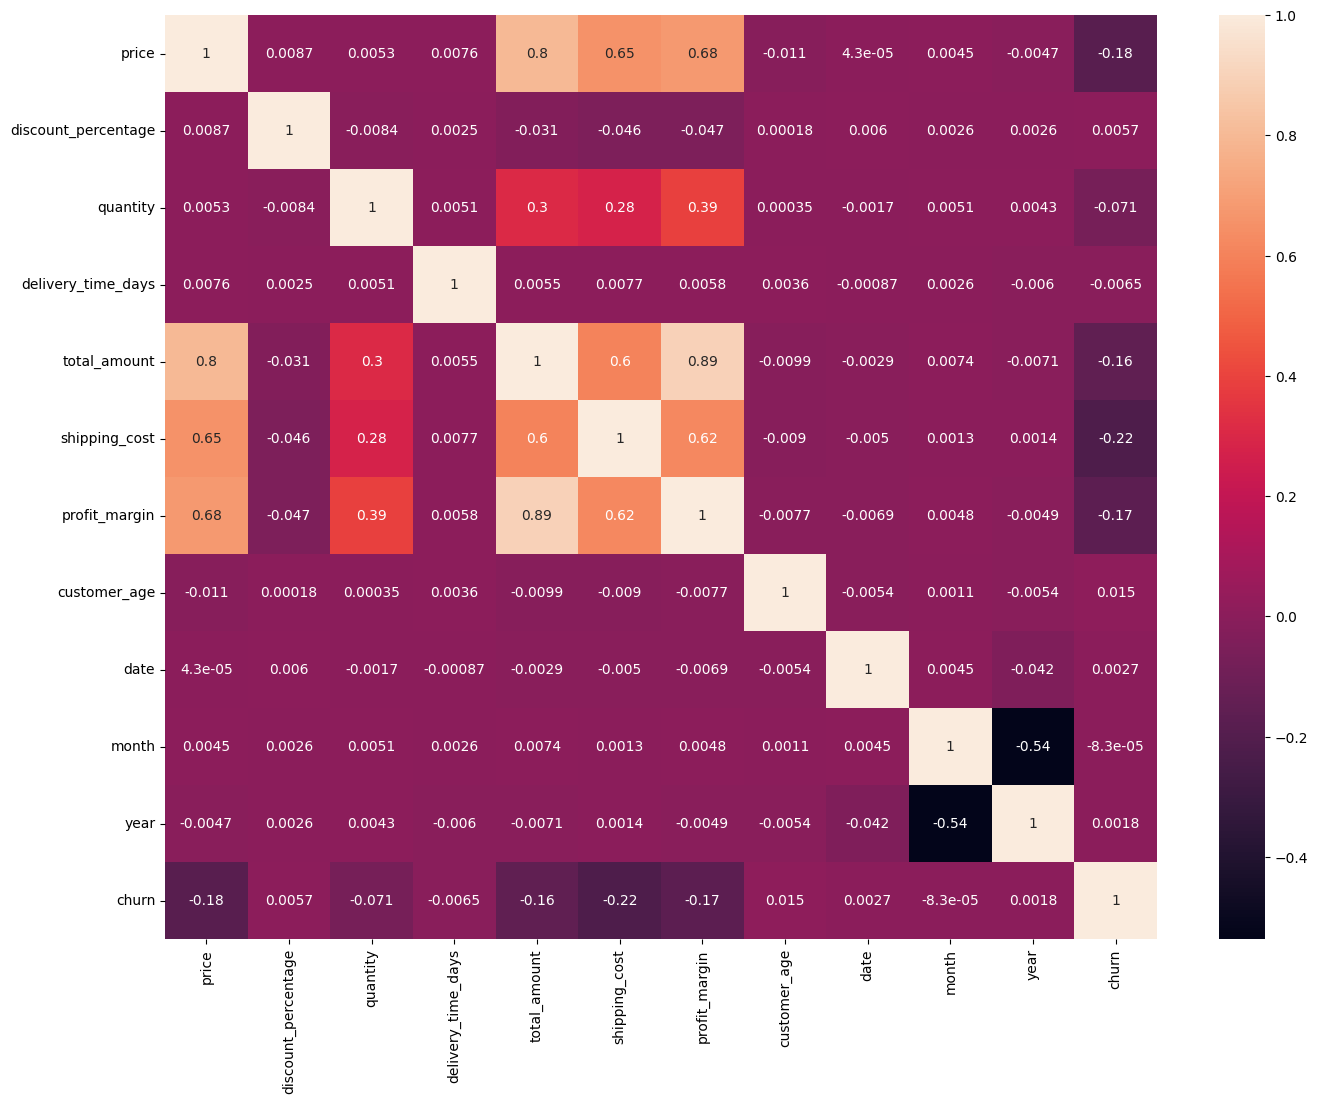

In [16]:
plt.figure(figsize=(16,12))
df_numeric = df_cleaned.select_dtypes(include="number")
sns.heatmap(df_numeric.corr(),annot=True)

In [17]:
df_cleaned[df_cleaned.duplicated()].sum()

category                 0
price                  0.0
discount_percentage      0
quantity                 0
payment_method           0
delivery_time_days       0
region                   0
returned                 0
total_amount           0.0
shipping_cost          0.0
profit_margin          0.0
customer_age             0
customer_gender          0
date                     0
month                    0
year                     0
churn                    0
dtype: object

In [18]:
df_cleaned.head(3)

,category,price,discount_percentage,quantity,payment_method,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,date,month,year,churn
0,Home,164.08,15,1,Credit Card,4,West,No,139.47,7.88,31.17,60,Female,23,12,2023,0
1,Grocery,24.73,0,1,Credit Card,6,South,No,24.73,4.60,-2.62,37,Male,3,4,2025,0
2,Electronics,175.58,5,1,Credit Card,4,North,No,166.80,6.58,13.44,34,Male,8,10,2024,1


In [19]:
df_cleaned["category"].unique()

array(['Home', 'Grocery', 'Electronics', 'Beauty', 'Fashion', 'Toys',
       'Sports'], dtype=object)

In [20]:
df_cleaned.head()

,category,price,discount_percentage,quantity,payment_method,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,date,month,year,churn
0,Home,164.08,15,1,Credit Card,4,West,No,139.47,7.88,31.17,60,Female,23,12,2023,0
1,Grocery,24.73,0,1,Credit Card,6,South,No,24.73,4.60,-2.62,37,Male,3,4,2025,0
2,Electronics,175.58,5,1,Credit Card,4,North,No,166.80,6.58,13.44,34,Male,8,10,2024,1
3,Electronics,63.67,0,1,UPI,6,South,No,63.67,5.50,2.14,21,Female,14,9,2024,0
4,Home,16.33,15,1,COD,6,East,No,13.88,2.74,1.15,39,Male,21,12,2024,0


In [21]:
df_cleaned["returned"].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
df_cleaned.columns

Index(['category', 'price', 'discount_percentage', 'quantity',
       'payment_method', 'delivery_time_days', 'region', 'returned',
       'total_amount', 'shipping_cost', 'profit_margin', 'customer_age',
       'customer_gender', 'date', 'month', 'year', 'churn'],
      dtype='object')

In [23]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
ordinalencoder = OrdinalEncoder()
ord_cols = ["returned","customer_gender"]
df_cleaned[ord_cols] = ordinalencoder.fit_transform(df_cleaned[ord_cols]).astype(int)

In [24]:
df_cleaned.head()

,category,price,discount_percentage,quantity,payment_method,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,date,month,year,churn
0,Home,164.08,15,1,Credit Card,4,West,0,139.47,7.88,31.17,60,0,23,12,2023,0
1,Grocery,24.73,0,1,Credit Card,6,South,0,24.73,4.60,-2.62,37,1,3,4,2025,0
2,Electronics,175.58,5,1,Credit Card,4,North,0,166.80,6.58,13.44,34,1,8,10,2024,1
3,Electronics,63.67,0,1,UPI,6,South,0,63.67,5.50,2.14,21,0,14,9,2024,0
4,Home,16.33,15,1,COD,6,East,0,13.88,2.74,1.15,39,1,21,12,2024,0


In [25]:
one_cols = ["category", "payment_method", "region"]
onehotencoder = OneHotEncoder(sparse_output=False)

encoded = onehotencoder.fit_transform(df_cleaned[one_cols])

In [26]:
encoded_df = pd.DataFrame(encoded,columns=onehotencoder.get_feature_names_out(one_cols), index = df_cleaned.index)

In [27]:
df_cleaned = pd.concat([df_cleaned,encoded_df],axis=1)

In [28]:
df_cleaned

,category,price,discount_percentage,quantity,payment_method,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,date,month,year,churn,category_Beauty,category_Electronics,category_Fashion,category_Grocery,category_Home,category_Sports,category_Toys,payment_method_COD,payment_method_Credit Card,payment_method_Debit Card,payment_method_PayPal,payment_method_UPI,payment_method_Wallet,region_Central,region_East,region_North,region_South,region_West
0,Home,164.08,15,1,Credit Card,4,West,0,139.47,7.88,31.17,60,0,23,12,2023,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Grocery,24.73,0,1,Credit Card,6,South,0,24.73,4.60,-2.62,37,1,3,4,2025,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Electronics,175.58,5,1,Credit Card,4,North,0,166.80,6.58,13.44,34,1,8,10,2024,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Electronics,63.67,0,1,UPI,6,South,0,63.67,5.50,2.14,21,0,14,9,2024,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Home,16.33,15,1,COD,6,East,0,13.88,2.74,1.15,39,1,21,12,2024,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,Fashion,10.44,20,1,Debit Card,3,North,0,8.35,3.04,-0.12,23,0,13,8,2025,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34496,Beauty,4.79,10,5,Debit Card,6,South,1,21.56,3.37,6.33,61,0,4,12,2023,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34497,Electronics,323.64,0,5,Credit Card,6,East,0,1618.20,12.18,182.00,41,0,1,2,2025,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34498,Home,23.09,5,1,Credit Card,6,East,0,21.94,5.61,0.53,27,0,27,3,2024,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
df_cleaned.drop(columns=["category", "payment_method", "region","returned","customer_gender"],axis=1,inplace=True)

In [30]:
df_cleaned.head()

,price,discount_percentage,quantity,delivery_time_days,total_amount,shipping_cost,profit_margin,customer_age,date,month,year,churn,category_Beauty,category_Electronics,category_Fashion,category_Grocery,category_Home,category_Sports,category_Toys,payment_method_COD,payment_method_Credit Card,payment_method_Debit Card,payment_method_PayPal,payment_method_UPI,payment_method_Wallet,region_Central,region_East,region_North,region_South,region_West
0,164.08,15,1,4,139.47,7.88,31.17,60,23,12,2023,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,24.73,0,1,6,24.73,4.60,-2.62,37,3,4,2025,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,175.58,5,1,4,166.80,6.58,13.44,34,8,10,2024,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,63.67,0,1,6,63.67,5.50,2.14,21,14,9,2024,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16.33,15,1,6,13.88,2.74,1.15,39,21,12,2024,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
target = 'churn'
cols = [col for col in df_cleaned.columns if col != target] + [target]
df_cleaned = df_cleaned[cols]


<Axes: >

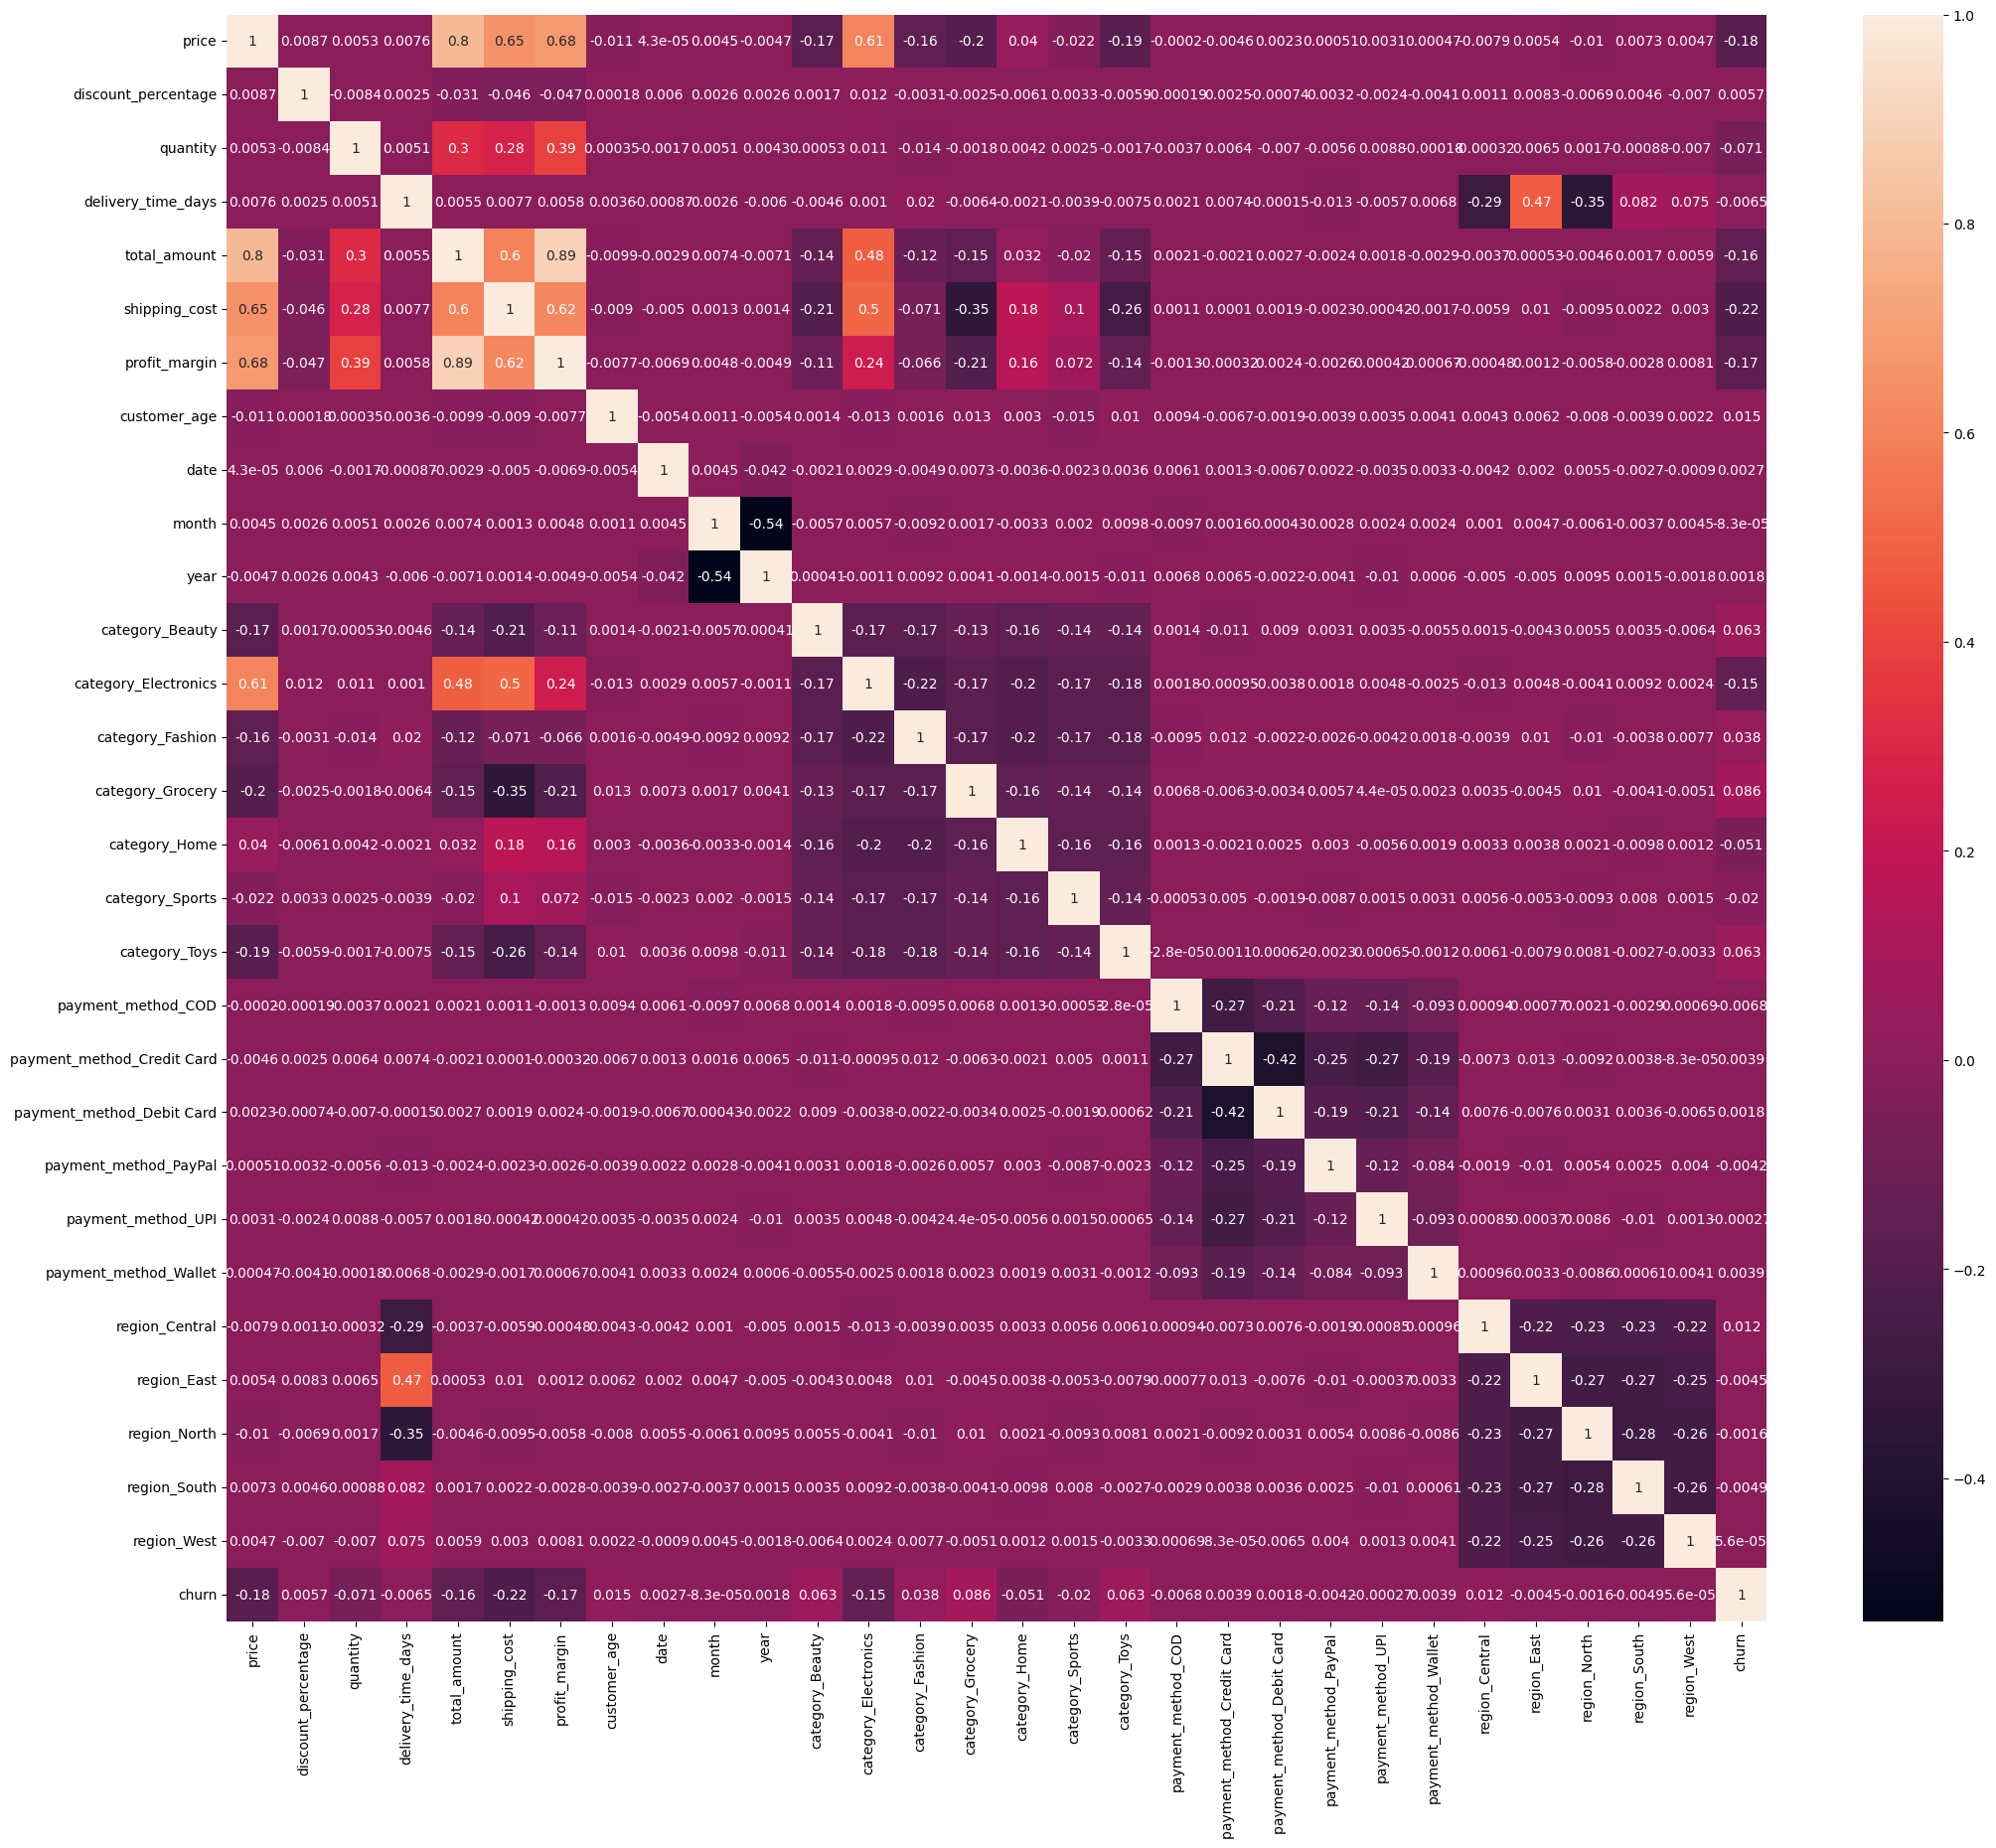

In [32]:
plt.figure(figsize=(25,21))
sns.heatmap(df_cleaned.corr(),annot=True)

In [33]:
df_cleaned.columns

Index(['price', 'discount_percentage', 'quantity', 'delivery_time_days',
       'total_amount', 'shipping_cost', 'profit_margin', 'customer_age',
       'date', 'month', 'year', 'category_Beauty', 'category_Electronics',
       'category_Fashion', 'category_Grocery', 'category_Home',
       'category_Sports', 'category_Toys', 'payment_method_COD',
       'payment_method_Credit Card', 'payment_method_Debit Card',
       'payment_method_PayPal', 'payment_method_UPI', 'payment_method_Wallet',
       'region_Central', 'region_East', 'region_North', 'region_South',
       'region_West', 'churn'],
      dtype='object')

In [34]:
def futureEngineering(dataset,threshold):
    drop_feature = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                drop_feature.add(corr_matrix.columns[i])
    return drop_feature

futureEngineering(df_cleaned,0.85)

{'profit_margin'}

In [35]:
df_cleaned.corr()

,price,discount_percentage,quantity,delivery_time_days,total_amount,shipping_cost,profit_margin,customer_age,date,month,year,category_Beauty,category_Electronics,category_Fashion,category_Grocery,category_Home,category_Sports,category_Toys,payment_method_COD,payment_method_Credit Card,payment_method_Debit Card,payment_method_PayPal,payment_method_UPI,payment_method_Wallet,region_Central,region_East,region_North,region_South,region_West,churn
price,1.000000,0.008736,0.005324,0.007612,0.801426,0.654110,0.679105,-0.010550,0.000043,0.004537,-0.004669,-0.174511,0.609012,-0.155882,-0.196212,0.040222,-0.022405,-0.186222,-0.000203,-0.004614,0.002304,0.000508,0.003116,0.000469,-0.007881,0.005403,-0.009964,0.007278,0.004675,-0.183068
discount_percentage,0.008736,1.000000,-0.008431,0.002490,-0.031202,-0.046383,-0.047470,0.000181,0.006043,0.002646,0.002619,0.001675,0.011875,-0.003141,-0.002477,-0.006136,0.003315,-0.005857,-0.000193,0.002495,-0.000743,0.003169,-0.002427,-0.004085,0.001112,0.008285,-0.006897,0.004581,-0.006956,0.005721
quantity,0.005324,-0.008431,1.000000,0.005120,0.304134,0.278292,0.388398,0.000352,-0.001650,0.005077,0.004276,0.000534,0.010567,-0.014123,-0.001772,0.004199,0.002498,-0.001714,-0.003668,0.006434,-0.007042,-0.005607,0.008840,-0.000176,-0.000316,0.006453,0.001670,-0.000875,-0.007020,-0.071337
delivery_time_days,0.007612,0.002490,0.005120,1.000000,0.005495,0.007651,0.005832,0.003624,-0.000871,0.002601,-0.006033,-0.004590,0.001048,0.019988,-0.006449,-0.002140,-0.003940,-0.007523,0.002144,0.007382,-0.000151,-0.013087,-0.005651,0.006755,-0.287255,0.473008,-0.354133,0.081710,0.074518,-0.006512
total_amount,0.801426,-0.031202,0.304134,0.005495,1.000000,0.599079,0.893327,-0.009870,-0.002936,0.007428,-0.007126,-0.136389,0.479661,-0.124526,-0.152990,0.032112,-0.019717,-0.145600,0.002076,-0.002073,0.002688,-0.002430,0.001765,-0.002909,-0.003726,0.000526,-0.004564,0.001713,0.005894,-0.155289
shipping_cost,0.654110,-0.046383,0.278292,0.007651,0.599079,1.000000,0.616730,-0.008951,-0.004995,0.001276,0.001374,-0.209088,0.503388,-0.070851,-0.347058,0.177807,0.102885,-0.258137,0.001112,0.000102,0.001899,-0.002287,-0.000417,-0.001719,-0.005919,0.009956,-0.009485,0.002247,0.003014,-0.220925
profit_margin,0.679105,-0.047470,0.388398,0.005832,0.893327,0.616730,1.000000,-0.007712,-0.006925,0.004826,-0.004942,-0.111049,0.241722,-0.066318,-0.207905,0.160971,0.072071,-0.141780,-0.001288,-0.000323,0.002436,-0.002571,0.000419,0.000666,-0.000483,0.001248,-0.005782,-0.002826,0.008148,-0.167801
customer_age,-0.010550,0.000181,0.000352,0.003624,-0.009870,-0.008951,-0.007712,1.000000,-0.005445,0.001122,-0.005431,0.001361,-0.012900,0.001634,0.013255,0.002990,-0.014889,0.010249,0.009380,-0.006694,-0.001902,-0.003910,0.003540,0.004147,0.004305,0.006204,-0.008022,-0.003909,0.002175,0.015200
date,0.000043,0.006043,-0.001650,-0.000871,-0.002936,-0.004995,-0.006925,-0.005445,1.000000,0.004545,-0.041653,-0.002103,0.002883,-0.004851,0.007295,-0.003634,-0.002301,0.003572,0.006067,0.001302,-0.006674,0.002155,-0.003497,0.003251,-0.004221,0.002001,0.005450,-0.002748,-0.000901,0.002747
month,0.004537,0.002646,0.005077,0.002601,0.007428,0.001276,0.004826,0.001122,0.004545,1.000000,-0.536706,-0.005670,0.005654,-0.009187,0.001735,-0.003332,0.001950,0.009831,-0.009697,0.001629,0.000428,0.002794,0.002450,0.002359,0.001019,0.004676,-0.006083,-0.003653,0.004480,-0.000083


In [36]:
df_cleaned.drop(columns=['profit_margin'],axis=1,inplace=True)

In [37]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       34500 non-null  float64
 1   discount_percentage         34500 non-null  int64  
 2   quantity                    34500 non-null  int64  
 3   delivery_time_days          34500 non-null  int64  
 4   total_amount                34500 non-null  float64
 5   shipping_cost               34500 non-null  float64
 6   customer_age                34500 non-null  int64  
 7   date                        34500 non-null  int64  
 8   month                       34500 non-null  int64  
 9   year                        34500 non-null  int64  
 10  category_Beauty             34500 non-null  float64
 11  category_Electronics        34500 non-null  float64
 12  category_Fashion            34500 non-null  float64
 13  category_Grocery            345

In [38]:
df_cleaned.head(3)

,price,discount_percentage,quantity,delivery_time_days,total_amount,shipping_cost,customer_age,date,month,year,category_Beauty,category_Electronics,category_Fashion,category_Grocery,category_Home,category_Sports,category_Toys,payment_method_COD,payment_method_Credit Card,payment_method_Debit Card,payment_method_PayPal,payment_method_UPI,payment_method_Wallet,region_Central,region_East,region_North,region_South,region_West,churn
0,164.08,15,1,4,139.47,7.88,60,23,12,2023,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,24.73,0,1,6,24.73,4.60,37,3,4,2025,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,175.58,5,1,4,166.80,6.58,34,8,10,2024,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [39]:
df_cleaned["quantity"].unique()

array([1, 2, 4, 3, 5])

In [40]:
X = df_cleaned.drop(columns=['churn'])
y = df_cleaned['churn']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=42,shuffle=True,stratify=y)

In [42]:
X_train.head(3)

,price,discount_percentage,quantity,delivery_time_days,total_amount,shipping_cost,customer_age,date,month,year,category_Beauty,category_Electronics,category_Fashion,category_Grocery,category_Home,category_Sports,category_Toys,payment_method_COD,payment_method_Credit Card,payment_method_Debit Card,payment_method_PayPal,payment_method_UPI,payment_method_Wallet,region_Central,region_East,region_North,region_South,region_West
25782,18.67,10,1,4,16.80,5.36,62,23,1,2025,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4135,15.16,0,1,4,15.16,4.75,30,17,9,2023,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24199,19.14,0,1,4,19.14,3.70,38,11,4,2024,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ["price","discount_percentage","quantity","delivery_time_days","total_amount","shipping_cost","customer_age","date","month","year"]

X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [44]:
# from imblearn.over_sampling import SMOTE
# oversampling = SMOTE()
# X_train,y_train = oversampling.fit_resample(X_train,y_train)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix 

model = LogisticRegression(class_weight="balanced")
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_pred=y_pred,y_true=y_test)
report = classification_report(y_pred=y_pred,y_true=y_test)
matrix = confusion_matrix(y_pred=y_pred,y_true=y_test)
print(acc_score)
print(matrix)
print(report)



0.5298550724637681
[[4110 4634]
 [ 232 1374]]
              precision    recall  f1-score   support

           0       0.95      0.47      0.63      8744
           1       0.23      0.86      0.36      1606

    accuracy                           0.53     10350
   macro avg       0.59      0.66      0.49     10350
weighted avg       0.84      0.53      0.59     10350



In [48]:
from sklearn.metrics import roc_auc_score,roc_curve

y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = roc_auc_score(y_pred,y_pred_prob)
y_pred


1.0

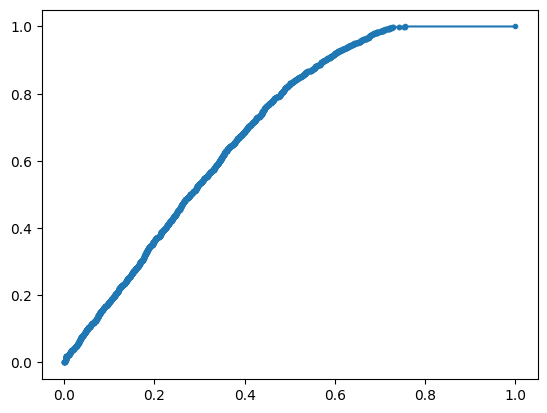

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr,tpr,marker =".",label = "logistic")

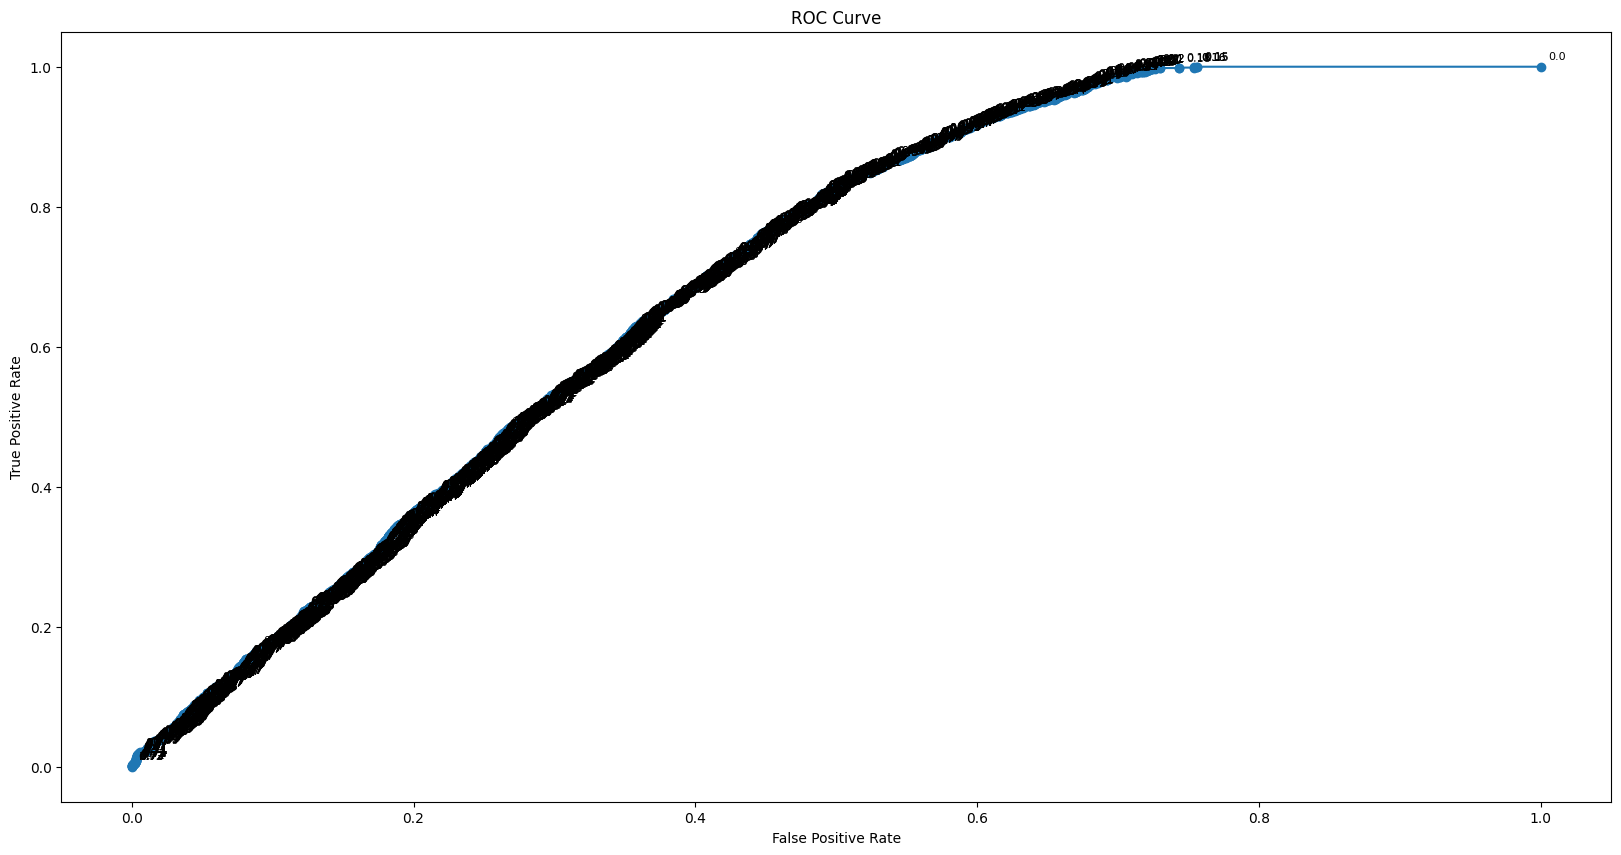

In [56]:
fig = plt.figure(figsize=(20, 10))  # 50 is too large unless you need it
ax = fig.add_subplot(111)

# Plot the ROC curve
ax.plot(fpr, tpr, marker="o")

# Annotate each point with its threshold value
for f, t, thresh in zip(fpr, tpr, thresholds):
    ax.annotate(
        text=str(round(thresh, 2)),   # ✅ fixed formatting
        xy=(f, t),                    # ✅ correct placement
        textcoords="offset points",
        xytext=(5, 5),                # slight offset so text doesn't overlap
        fontsize=8
    )

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve")
plt.show()


In [70]:
from xgboost import XGBClassifier

ratio = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = XGBClassifier(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=ratio,   
    eval_metric='auc',
    random_state=42
)


xgb_model.fit(X_train,y_train)
xgb_pred = xgb_model.predict(X_test)
print(".....................Xgb score and matrix.......................")
acc_score = accuracy_score(y_pred=xgb_pred,y_true=y_test)
report = classification_report(y_pred=xgb_pred,y_true=y_test)
matrix = confusion_matrix(y_pred=xgb_pred,y_true=y_test)
print(acc_score)
print(matrix)
print(report)


.....................Xgb score and matrix.......................
0.6642512077294686
[[6074 2670]
 [ 805  801]]
              precision    recall  f1-score   support

           0       0.88      0.69      0.78      8744
           1       0.23      0.50      0.32      1606

    accuracy                           0.66     10350
   macro avg       0.56      0.60      0.55     10350
weighted avg       0.78      0.66      0.71     10350



In [ ]:
from sklearn.model_selection import train_test_split
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.pipeline import Pipeline
X = cleaned_df.drop(columns=["churn","profit_margin"])
y = cleaned_df["churn"]

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=42,shuffle=True,stratify=y)


one_cols = ["category", "payment_method", "region"]
ord_cols = ["returned","customer_gender"]
num_cols = ["price","discount_percentage","quantity","delivery_time_days","total_amount","shipping_cost","customer_age","date","month","year"]

one_pipeline = Pipeline([
    ("onehotencoder",OneHotEncoder())
])

ordi_pipeline = Pipeline([
    ("ordinalencoder",OrdinalEncoder())
])

scaler_pipeline = Pipeline([
    ("scaler",StandardScaler())
])
ratio = (y_train == 0).sum() / (y_train == 1).sum()
xgb = XGBClassifier(
    n_estimators=600, learning_rate=0.05, max_depth=6,
    subsample=0.8, colsample_bytree=0.8,
    scale_pos_weight=ratio, eval_metric="auc", random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[   
        ("onehot", one_pipeline,    one_cols),
        ("ord",    ordi_pipeline,   ord_cols),
        ("num",    scaler_pipeline, num_cols)
    ],
    remainder="drop",
    verbose_feature_names_out=False,
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", xgb)
])


pipeline.fit_transform(X_train, y_train)

with open(r"D:\Genai_Projects\ai_ecom_agent\models\churn_xgb_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("✅ Saved: churn_xgb_pipeline.pkl")



AttributeError: This 'Pipeline' has no attribute 'fit_transform'

In [ ]:
with open(r"D:\Genai_Projects\ai_ecom_agent\models\churn_xgb_pipeline.pkl", "rb") as f:
    churn_pipeline = pickle.load(f)

print("✅ Model pipeline loaded successfully")

✅ Model pipeline loaded successfully


In [ ]:
y_pred = churn_pipeline.predict(X_test)
print(".....................Xgb score and matrix.......................")
acc_score = accuracy_score(y_pred=y_pred,y_true=y_test)
report = classification_report(y_pred=y_pred,y_true=y_test)
matrix = confusion_matrix(y_pred=y_pred,y_true=y_test)
print(acc_score)
print(matrix)
print(report)

.....................Xgb score and matrix.......................
0.6685990338164252
[[6154 2590]
 [ 840  766]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      8744
           1       0.23      0.48      0.31      1606

    accuracy                           0.67     10350
   macro avg       0.55      0.59      0.55     10350
weighted avg       0.78      0.67      0.71     10350



In [ ]:
import pandas as pd

X_test.to_csv(r"D:\Genai_Projects\ai_ecom_agent\csv_data/x_test_sample.csv", index=False)
y_test.to_csv(r"D:\Genai_Projects\ai_ecom_agent\csv_data/y_test_sample.csv", index=False)
print("✅ Saved local test samples for validation.")

✅ Saved local test samples for validation.
